## Sequential API
##### Okay so this model is build with the help of keras api to do regression task on the california dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
## Importing the data and the scaling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [ ]:
### Seting the data with correct labels
housing = fetch_california_housing()
# The main structure of split
X_train,X_test,y_train,y_test = train_test_split(housing.data,housing.target,random_state=42,test_size=0.2)
## Creating the vaildation set
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,random_state=42)

## Lets create the scalar class object
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

##### The main structure of the neural network is that it consist of output layer with single neuron with no activation function and loss function is mean_squared_error

Epoch 1/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3156 - val_loss: 22.9455
Epoch 2/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2468 - val_loss: 0.4755
Epoch 3/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4309 - val_loss: 0.4173
Epoch 4/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3954 - val_loss: 0.3961
Epoch 5/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3683 - val_loss: 0.3850
Epoch 6/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3661 - val_loss: 0.3812
Epoch 7/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3686 - val_loss: 0.3701
Epoch 8/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3703 - val_loss: 0.3860
Epoch 9/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3635 - val_loss: 0.3737
Epoch 10/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3531 - val_loss: 0.3691
Epoch 11/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3389 - val_loss: 0.3611
Epoch 12/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

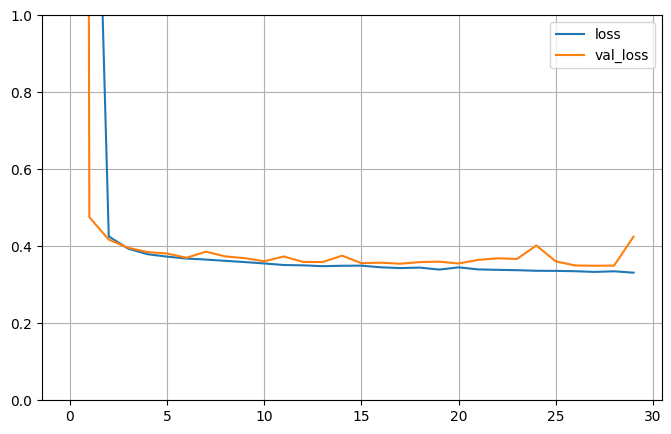

Predications:
[[0.77397275]
 [1.5096395 ]
 [4.615576  ]]


In [ ]:
## Lets build the neural network
model = keras.models.Sequential([
    keras.layers.Dense(30,activation=keras.activations.relu,input_shape=X_train.shape[1:]), # 30 neurons in the first layer with relu activation layer and the shape of the training data
    keras.layers.Dense(1) # output layer with single neuron and no activation function
])
## Compiling the model
model.compile(loss='mean_squared_error',optimizer='sgd')
## Lets fit the model
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))
## Creating the metrics dataframe
import pandas as pd
import matplotlib.pyplot as plt
metric_df = pd.DataFrame(history.history)
## Lets evaluate the model
model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
## Ploting the error chart
metric_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # vertical range from 0 to 1
plt.show()
## Print the X_new data
print(f"Predications:\n{y_pred}")

## All done!!